# IBM Dynamical Decoupling Optimizations with Superstaq

<a target="_blank" href="https://colab.research.google.com/github/Infleqtion/client-superstaq/blob/main/docs/source/optimizations/ibm/ibmq_dd.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" align="left"/>
</a>
<a target="_blank" href="https://mybinder.org/v2/gh/Infleqtion/client-superstaq/HEAD?labpath=docs/source/optimizations/ibm/ibmq_dd.ipynb">
  <img src="https://mybinder.org/badge_logo.svg" alt="Launch Binder" align="left" style="margin-left: 10px;"/>
</a>

[Dynamical decoupling (DD)](https://arxiv.org/abs/quant-ph/9803057) is an error mitigation technique used to suppress noise added to computation from system-environment interaction (i.e. decoherence error). DD is implemented during algorithm execution by adding special gate sequences that are equal to the identity operation in periods of qubit idling. Examples of DD sequences include XX, XY4, XY8, and UDD, among others.

Below is a brief tutorial on Superstaq dynamical decoupling optimizations for the IBM family of superconducting quantum devices. In the example, a CPMG sequence, XX, will be used. 

Many [research articles](https://arxiv.org/abs/2207.03670) can be found that describe the variations and benefits of DD. For more information about IBM Quantum, visit their website [here](https://quantum-computing.ibm.com/).

Users have the ability to specify the dynamical decoupling strategy desired. The following dynamical decoupling strategies are supported: <br> 
<br>
**Dynamic (default)**: Spaces pulses in a sequence based on sequence length, oblivious to sequences placed on neighboring qubits. <br>
**Static**: Inserts as many pulses in an idling duration as possible (not recommended for most circuits). <br>
**Static_context_aware**: Spacing each sequence's gates based on a specific value <br>


In [2]:
# Required imports
try:
    import qiskit
    import qiskit_superstaq as qss
except ImportError:
    print("Installing qiskit-superstaq...")
    %pip install -q qiskit-superstaq[examples]
    print("Installed qiskit-superstaq. Please restart the kernel to import the packages.")

import numpy as np

# Optional imports
import os  # used if setting a token as an environment variable

To interface Superstaq via Qiskit, we must first instantiate a provider in `qiskit-superstaq` with `SuperstaqProvider()`. We then supply a Superstaq API token (or key) by either providing the API token as an argument of `qss.SuperstaqProvider()` or by setting it as an environment variable (see more details [here](https://superstaq.readthedocs.io/en/latest/get_started/basics/basics_qss.html#Set-up-access-to-Superstaq%E2%80%99s-API)).

In [3]:
# Get the qiskit superstaq provider for Superstaq backend
# Provide your api key to the using the "api_key" argument if
# SUPERSTAQ_API_KEY environment variable is not set.
provider = qss.SuperstaqProvider(
    api_key=os.environ["SUPERSTAQ_API_KEY"], remote_host="https://127.0.0.1:5000"
)

In [4]:
lagos_backend = provider.get_backend("ibmq_lagos_qpu")

/Users/paige/superstaq-env/lib/python3.10/site-packages/urllib3/connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [5]:
qc = qiskit.QuantumCircuit(5)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
qc.cx(2, 3)
qc.cx(3, 4)
qc.measure_all()
qc.draw()

┌───┐                     ░ ┌─┐            
   q_0: ┤ H ├──■──────────────────░─┤M├────────────
        └───┘┌─┴─┐                ░ └╥┘┌─┐         
   q_1: ─────┤ X ├──■─────────────░──╫─┤M├─────────
             └───┘┌─┴─┐           ░  ║ └╥┘┌─┐      
   q_2: ──────────┤ X ├──■────────░──╫──╫─┤M├──────
                  └───┘┌─┴─┐      ░  ║  ║ └╥┘┌─┐   
   q_3: ───────────────┤ X ├──■───░──╫──╫──╫─┤M├───
                       └───┘┌─┴─┐ ░  ║  ║  ║ └╥┘┌─┐
   q_4: ────────────────────┤ X ├─░──╫──╫──╫──╫─┤M├
                            └───┘ ░  ║  ║  ║  ║ └╥┘
meas: 5/═════════════════════════════╩══╩══╩══╩══╩═
                                     0  1  2  3  4

In [6]:
# Compile circuit for IBM Lagos device backend
qc_compiled = lagos_backend.compile(qc)
qc_compiled.circuit.draw(fold=-1)

/Users/paige/superstaq-env/lib/python3.10/site-packages/urllib3/connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


q_0: ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     ┌─────────┐                                                                                         ┌─────────────┐┌─────────┐┌─────────┐┌─────────┐┌─────────────┐┌─────────┐┌─────────┐             ░ ┌─┐            
q_1: ┤ Rx(π/2) ├─────────────────────────────────────────────────────────────────────────────────────────┤1            ├┤ Rz(π/2) ├┤ Rx(π/2) ├┤ Rz(π/2) ├┤1            ├┤ Rz(π/2) ├┤ Rx(π/2) ├─────────────░─┤M├────────────
     ├─────────┤┌─────────┐                                                                              │             │└─────────┘└─────────┘└─────────┘│  Acecr(π/2) │├─────────┤├─────────┤┌──────────┐ ░ └╥┘┌─┐         
q_2: ┤ Rz(π/2) ├┤ Rx(π/2) ├──────────────────────────────────────────────────────────────────────────────┤  Acecr(π/2) ├─────────────────────────────────┤0            ├┤ Rz(π/2) ├┤ Rx(π/2) ├┤ Rz(3π/2) ├─░──╫─┤M├─────────
     ├─────────┤└─────────┘                                               ┌─────────────┐┌─────────┐┌───┐│             │                                 └─────────────┘└─────────┘└─────────┘└──────────┘ ░  ║ └╥┘┌─┐      
q_3: ┤ Rx(π/2) ├──────────────────────────────────────────────────────────┤1            ├┤ Rz(π/2) ├┤ X ├┤0            ├───────────────────────────────────────────────────────────────────────────────────░──╫──╫─┤M├──────
     └─────────┘           ┌─────────────┐┌─────────┐ ┌─────────┐         │             │└─────────┘└───┘└─────────────┘                                                                                   ░  ║  ║ └╥┘┌─┐   
q_4: ──────────────────────┤1            ├┤ Rz(π/2) ├─┤ Rx(π/2) ├─────────┤  Acecr(π/2) ├──────────────────────────────────────────────────────────────────────────────────────────────────────────────────░──╫──╫──╫─┤M├───
     ┌─────────┐┌─────────┐│  Acecr(π/2) │├─────────┴┐├─────────┤┌───────┐│             │                                                                                                                  ░  ║  ║  ║ └╥┘┌─┐
q_5: ┤ Rz(π/2) ├┤ Rx(π/2) ├┤0            ├┤ Rz(3π/2) ├┤ Rx(π/2) ├┤ Rz(π) ├┤0            ├──────────────────────────────────────────────────────────────────────────────────────────────────────────────────░──╫──╫──╫──╫─┤M├
     └─────────┘└─────────┘└─────────────┘└──────────┘└─────────┘└───────┘└─────────────┘                                                                                                                  ░  ║  ║  ║  ║ └╥┘
q_6: ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╫──╫──╫──╫──╫─
                                                                                                                                                                                                              ║  ║  ║  ║  ║ 
c: 5/═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╩══╩══╩══╩═
                                                                                                                                                                                                              3  4  2  0  1

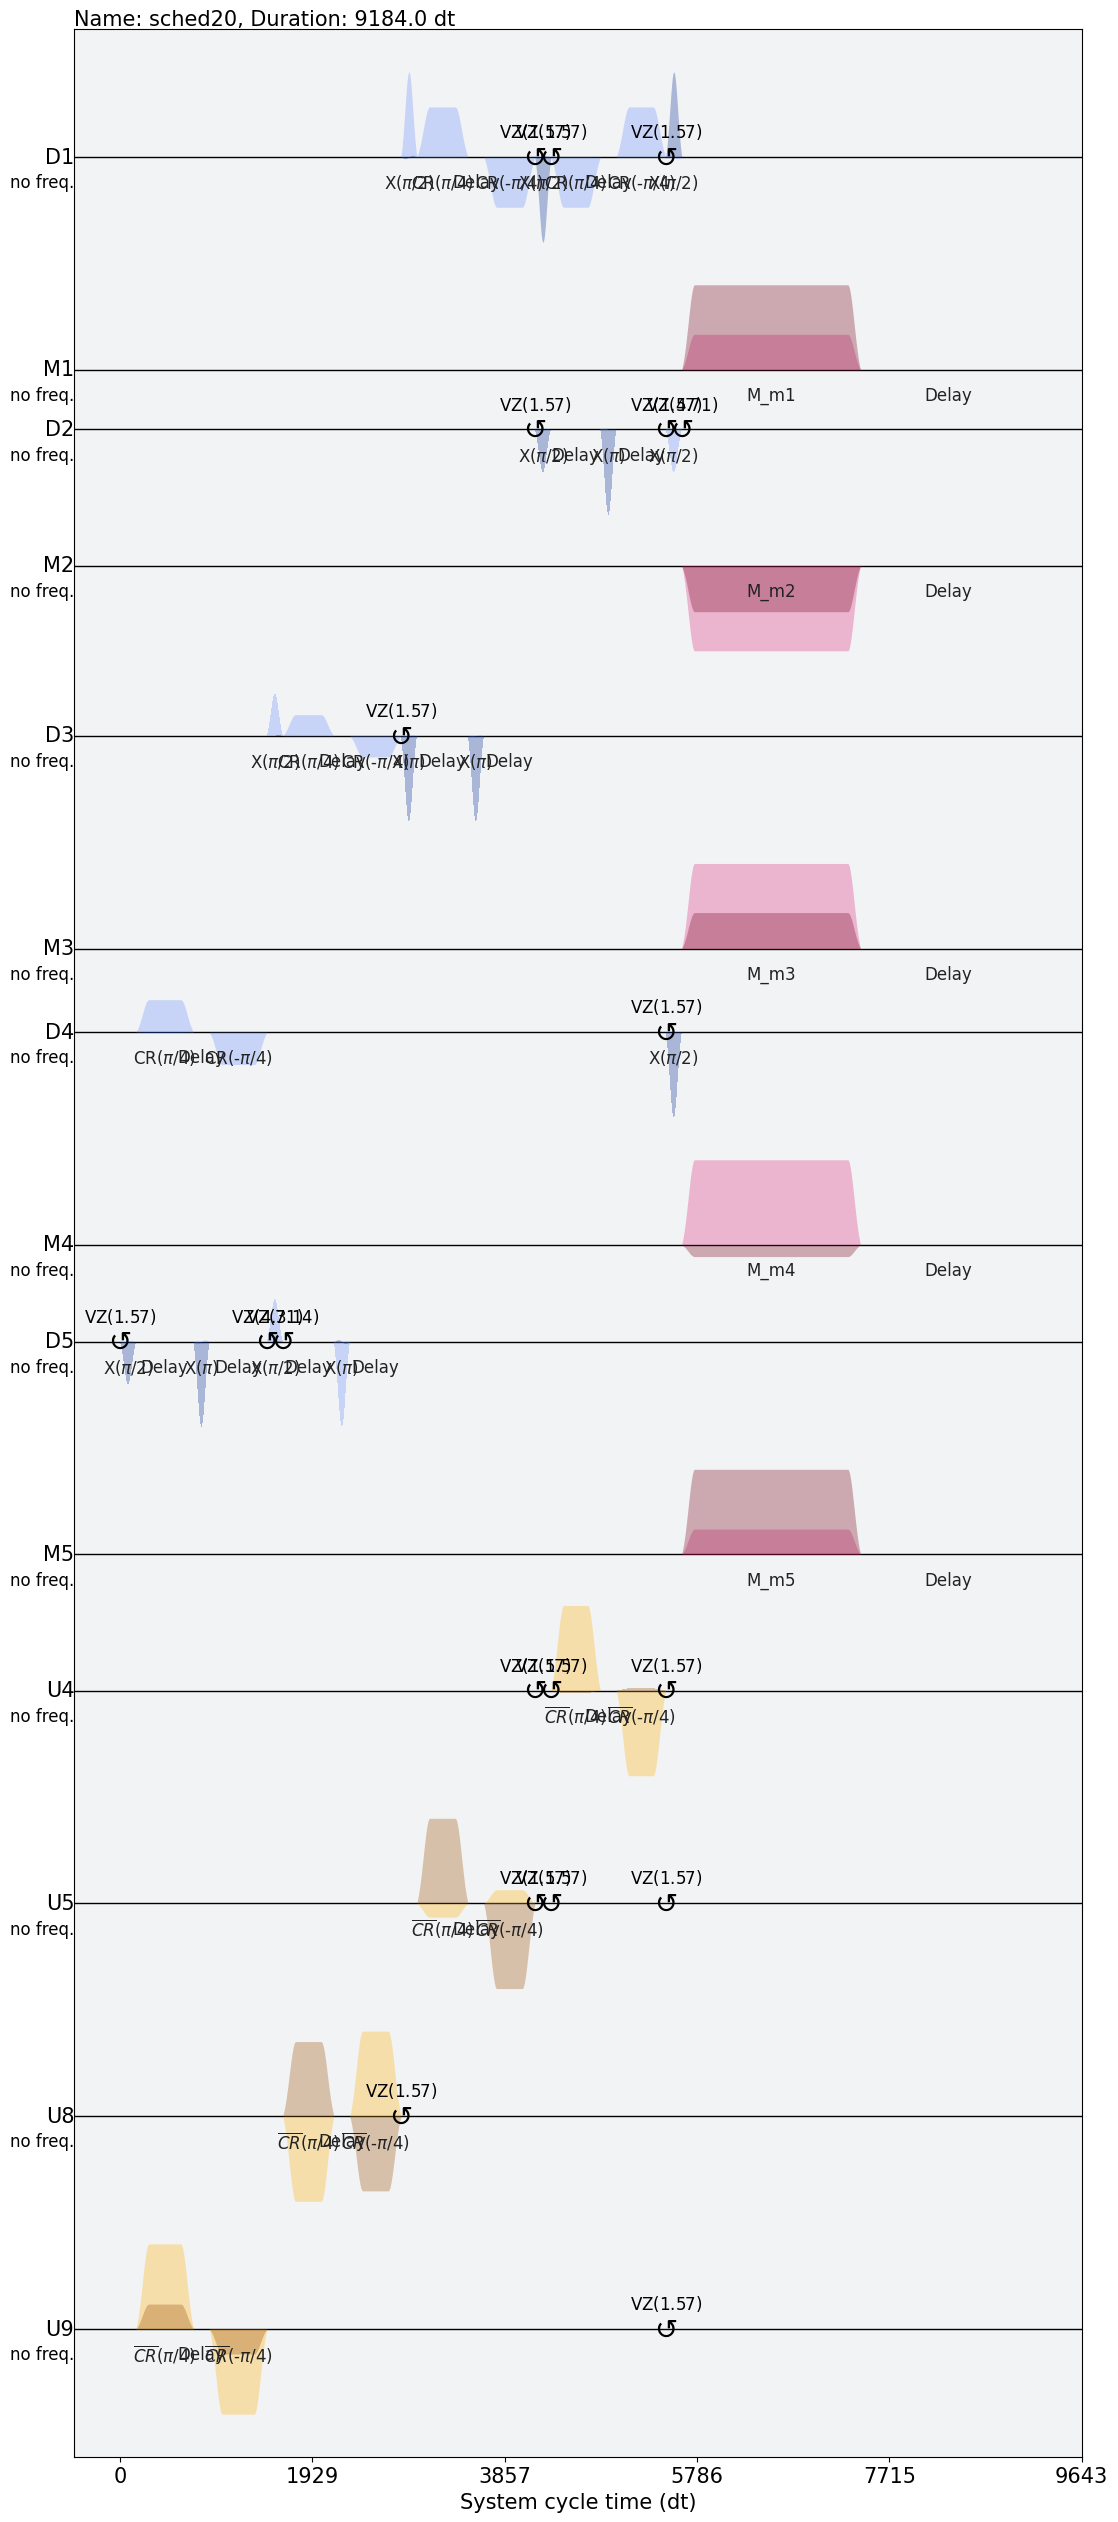

In [8]:
qc_compiled.pulse_sequence.draw()

In [9]:
# Compile with dynamical decoupling (default 'dynamic' strategy)
qc_compiled_dd_dynamic = lagos_backend.compile(qc, dynamical_decoupling=True)
qc_compiled_dd_dynamic.circuit.draw(fold=-1)

/Users/paige/superstaq-env/lib/python3.10/site-packages/urllib3/connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


q_0: ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     ┌─────────┐                                                                                                      ┌─────────────┐┌─────────┐┌─────────┐┌─────────┐┌─────────────┐┌─────────┐┌─────────┐             ░ ┌─┐            
q_1: ┤ Rx(π/2) ├──────────────────────────────────────────────────────────────────────────────────────────────────────┤1            ├┤ Rz(π/2) ├┤ Rx(π/2) ├┤ Rz(π/2) ├┤1            ├┤ Rz(π/2) ├┤ Rx(π/2) ├─────────────░─┤M├────────────
     ├─────────┤┌─────────┐                                                                                           │             │└─────────┘└─────────┘└─────────┘│  Acecr(π/2) │├─────────┤├─────────┤┌──────────┐ ░ └╥┘┌─┐         
q_2: ┤ Rz(π/2) ├┤ Rx(π/2) ├───────────────────────────────────────────────────────────────────────────────────────────┤  Acecr(π/2) ├─────────────────────────────────┤0            ├┤ Rz(π/2) ├┤ Rx(π/2) ├┤ Rz(3π/2) ├─░──╫─┤M├─────────
     ├─────────┤└─────────┘                                                            ┌─────────────┐┌─────────┐┌───┐│             │   ┌───┐      ┌───┐              └─────────────┘└─────────┘└─────────┘└──────────┘ ░  ║ └╥┘┌─┐      
q_3: ┤ Rx(π/2) ├───────────────────────────────────────────────────────────────────────┤1            ├┤ Rz(π/2) ├┤ X ├┤0            ├───┤ X ├──────┤ X ├────────────────────────────────────────────────────────────────░──╫──╫─┤M├──────
     └─────────┘           ┌─────────────┐   ┌───┐       ┌───┐   ┌─────────┐┌─────────┐│             │└─────────┘└───┘└─────────────┘   └───┘      └───┘                                                                ░  ║  ║ └╥┘┌─┐   
q_4: ──────────────────────┤1            ├───┤ X ├───────┤ X ├───┤ Rz(π/2) ├┤ Rx(π/2) ├┤  Acecr(π/2) ├──────────────────────────────────────────────────────────────────────────────────────────────────────────────────░──╫──╫──╫─┤M├───
     ┌─────────┐┌─────────┐│  Acecr(π/2) │┌──┴───┴───┐┌──┴───┴──┐└┬───────┬┘└─────────┘│             │   ┌───┐   ┌───┐                                                                                                  ░  ║  ║  ║ └╥┘┌─┐
q_5: ┤ Rz(π/2) ├┤ Rx(π/2) ├┤0            ├┤ Rz(3π/2) ├┤ Rx(π/2) ├─┤ Rz(π) ├────────────┤0            ├───┤ X ├───┤ X ├──────────────────────────────────────────────────────────────────────────────────────────────────░──╫──╫──╫──╫─┤M├
     └─────────┘└─────────┘└─────────────┘└──────────┘└─────────┘ └───────┘            └─────────────┘   └───┘   └───┘                                                                                                  ░  ║  ║  ║  ║ └╥┘
q_6: ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╫──╫──╫──╫──╫─
                                                                                                                                                                                                                           ║  ║  ║  ║  ║ 
c: 5/══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╩══╩══╩══╩═
                                                                                                                                                                                                                           3  4  2  0  1

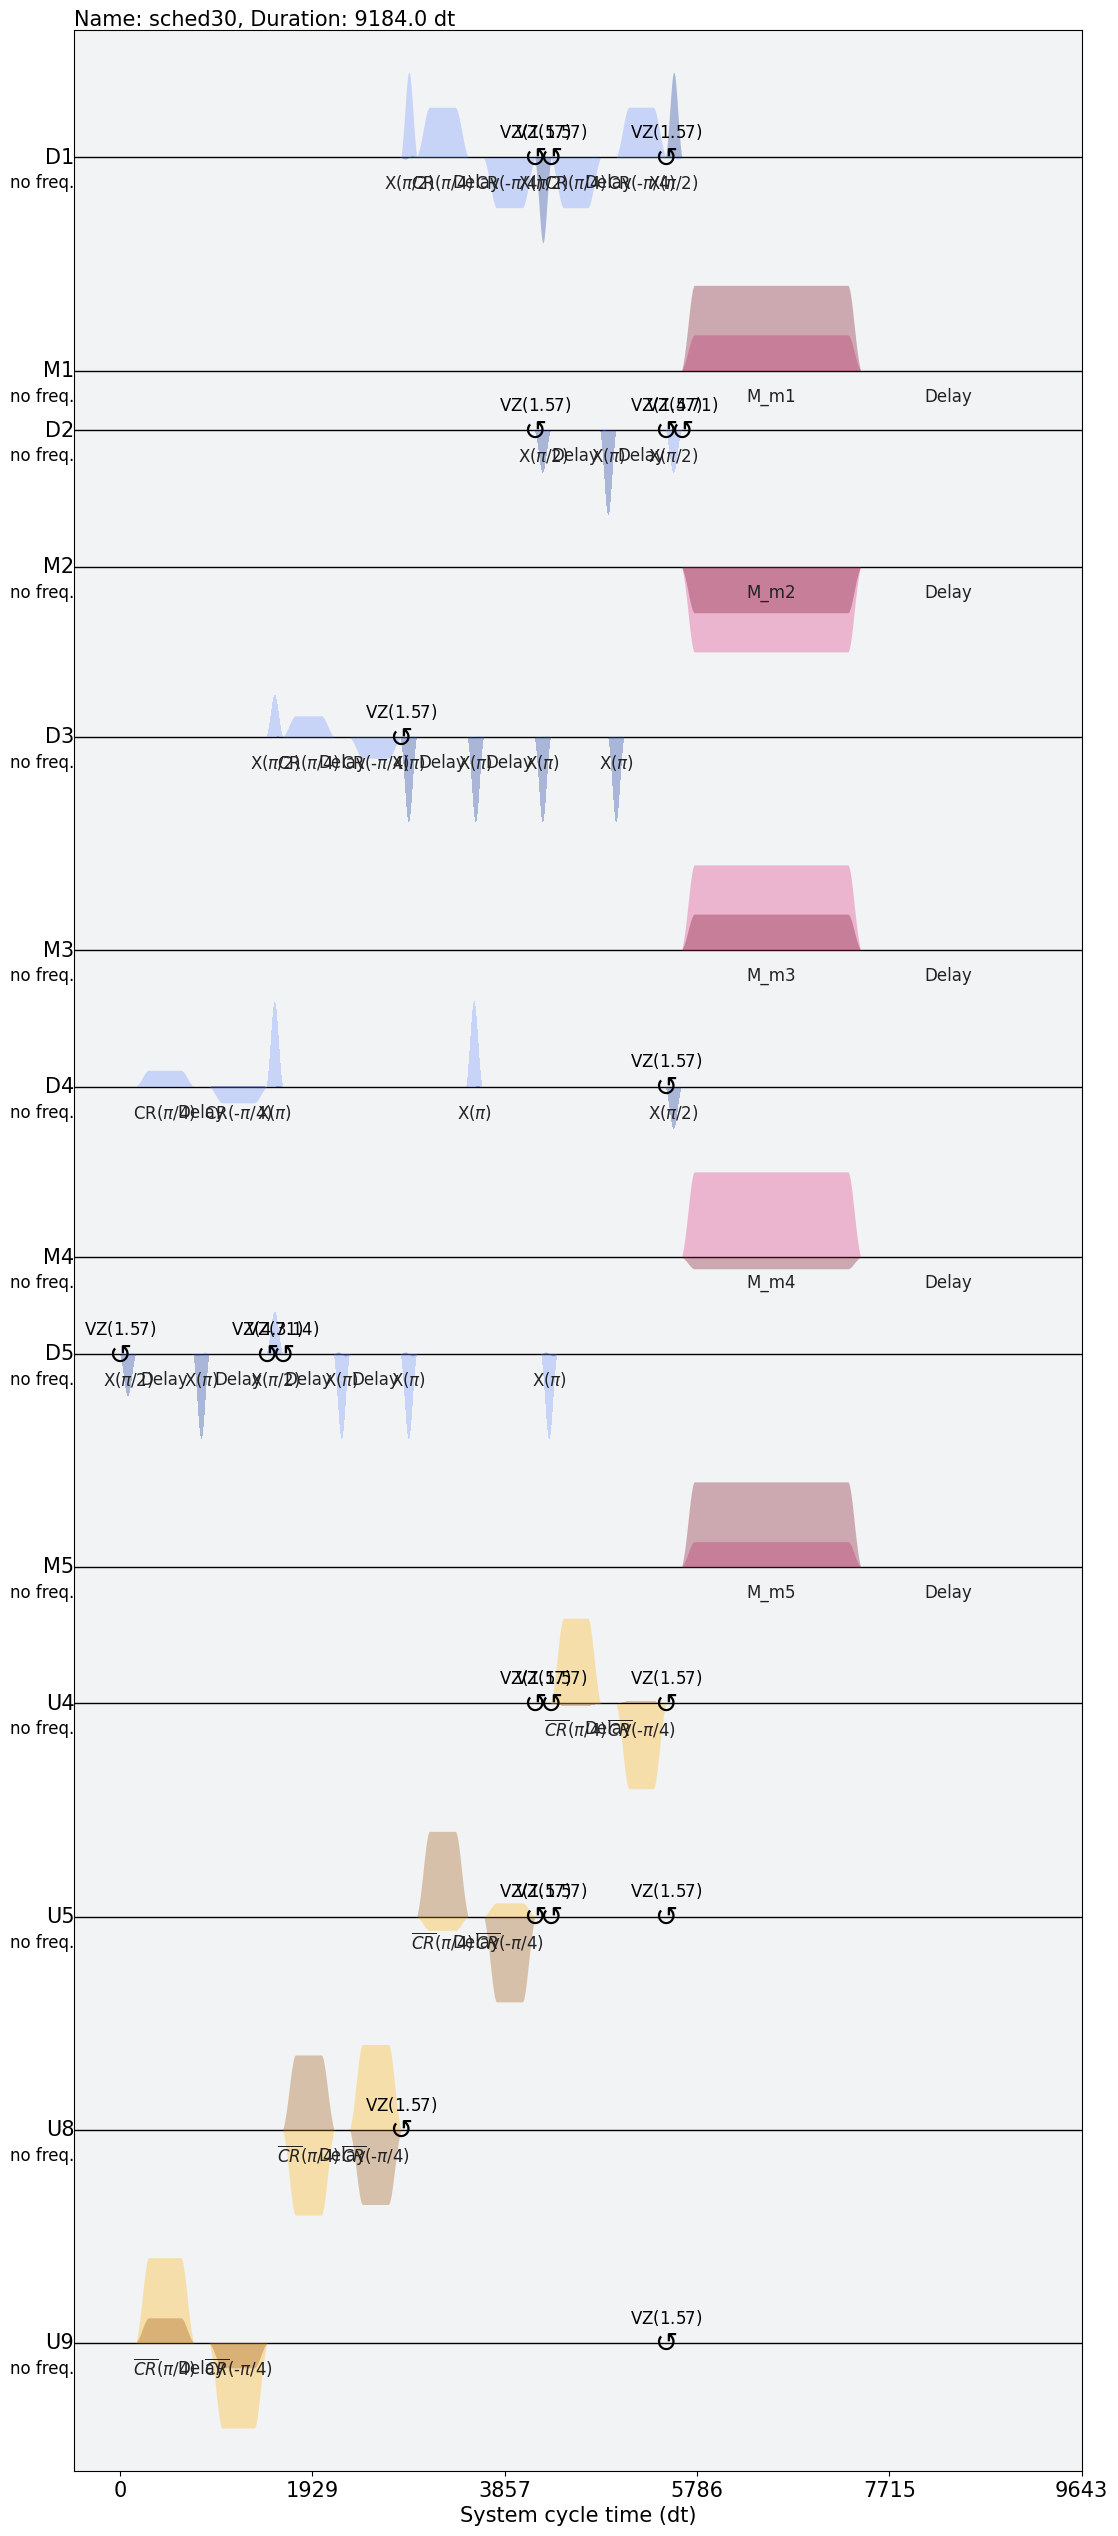

In [10]:
qc_compiled_dd_dynamic.pulse_sequence.draw()

In [11]:
# Compile with dynamical decoupling ('static' strategy)
qc_compiled_dd_static = lagos_backend.compile(qc, dynamical_decoupling=True, dd_strategy="static")
qc_compiled_dd_static.circuit.draw(fold=-1)

/Users/paige/superstaq-env/lib/python3.10/site-packages/urllib3/connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


q_0: ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     ┌─────────┐                                                                                              ┌─────────────┐┌─────────┐┌─────────┐┌─────────┐┌─────────────┐┌─────────┐┌─────────┐                                                                                     ░ ┌─┐            
q_1: ┤ Rx(π/2) ├──────────────────────────────────────────────────────────────────────────────────────────────┤1            ├┤ Rz(π/2) ├┤ Rx(π/2) ├┤ Rz(π/2) ├┤1            ├┤ Rz(π/2) ├┤ Rx(π/2) ├─────────────────────────────────────────────────────────────────────────────────────░─┤M├────────────
     ├─────────┤┌─────────┐                                                                                   │             │└─────────┘└─────────┘└─────────┘│  Acecr(π/2) │├─────────┤├─────────┤┌──────────┐                                                                         ░ └╥┘┌─┐         
q_2: ┤ Rz(π/2) ├┤ Rx(π/2) ├───────────────────────────────────────────────────────────────────────────────────┤  Acecr(π/2) ├─────────────────────────────────┤0            ├┤ Rz(π/2) ├┤ Rx(π/2) ├┤ Rz(3π/2) ├─────────────────────────────────────────────────────────────────────────░──╫─┤M├─────────
     ├─────────┤└─────────┘                                                    ┌─────────────┐┌─────────┐┌───┐│             │   ┌───┐      ┌───┐      ┌───┐   └────┬───┬────┘└──┬───┬──┘└──┬───┬──┘└──┬───┬───┘┌───┐                                                                    ░  ║ └╥┘┌─┐      
q_3: ┤ Rx(π/2) ├───────────────────────────────────────────────────────────────┤1            ├┤ Rz(π/2) ├┤ X ├┤0            ├───┤ X ├──────┤ X ├──────┤ X ├────────┤ X ├────────┤ X ├──────┤ X ├──────┤ X ├────┤ X ├────────────────────────────────────────────────────────────────────░──╫──╫─┤M├──────
     └─────────┘           ┌─────────────┐   ┌───┐       ┌───┐     ┌───┐  ┌───┐│             │└──┬───┬──┘├───┤└────┬───┬────┘   ├───┤      ├───┤      ├───┤        ├───┤        ├───┤      ├───┤      ├───┤    ├───┤┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌─────────┐┌─────────┐ ░  ║  ║ └╥┘┌─┐   
q_4: ──────────────────────┤1            ├───┤ X ├───────┤ X ├─────┤ X ├──┤ X ├┤  Acecr(π/2) ├───┤ X ├───┤ X ├─────┤ X ├────────┤ X ├──────┤ X ├──────┤ X ├────────┤ X ├────────┤ X ├──────┤ X ├──────┤ X ├────┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ Rz(π/2) ├┤ Rx(π/2) ├─░──╫──╫──╫─┤M├───
     ┌─────────┐┌─────────┐│  Acecr(π/2) │┌──┴───┴───┐┌──┴───┴──┐┌─┴───┴─┐└───┘│             │   ├───┤   ├───┤     ├───┤        ├───┤      ├───┤      ├───┤        ├───┤        ├───┤      ├───┤      ├───┤    ├───┤├───┤├───┤├───┤├───┤├───┤└───┘└───┘└───┘└───┘└─────────┘└─────────┘ ░  ║  ║  ║ └╥┘┌─┐
q_5: ┤ Rz(π/2) ├┤ Rx(π/2) ├┤0            ├┤ Rz(3π/2) ├┤ Rx(π/2) ├┤ Rz(π) ├─────┤0            ├───┤ X ├───┤ X ├─────┤ X ├────────┤ X ├──────┤ X ├──────┤ X ├────────┤ X ├────────┤ X ├──────┤ X ├──────┤ X ├────┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├───────────────────────────────────────────░──╫──╫──╫──╫─┤M├
     └─────────┘└─────────┘└─────────────┘└──────────┘└─────────┘└───────┘     └─────────────┘   └───┘   └───┘     └───┘        └───┘      └───┘      └───┘        └───┘        └───┘      └───┘      └───┘    └───┘└───┘└───┘└───┘└───┘└───┘                                           ░  ║  ║  ║  ║ └╥┘
q_6: ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╫──╫──╫──╫──╫─
                                                                                                                              

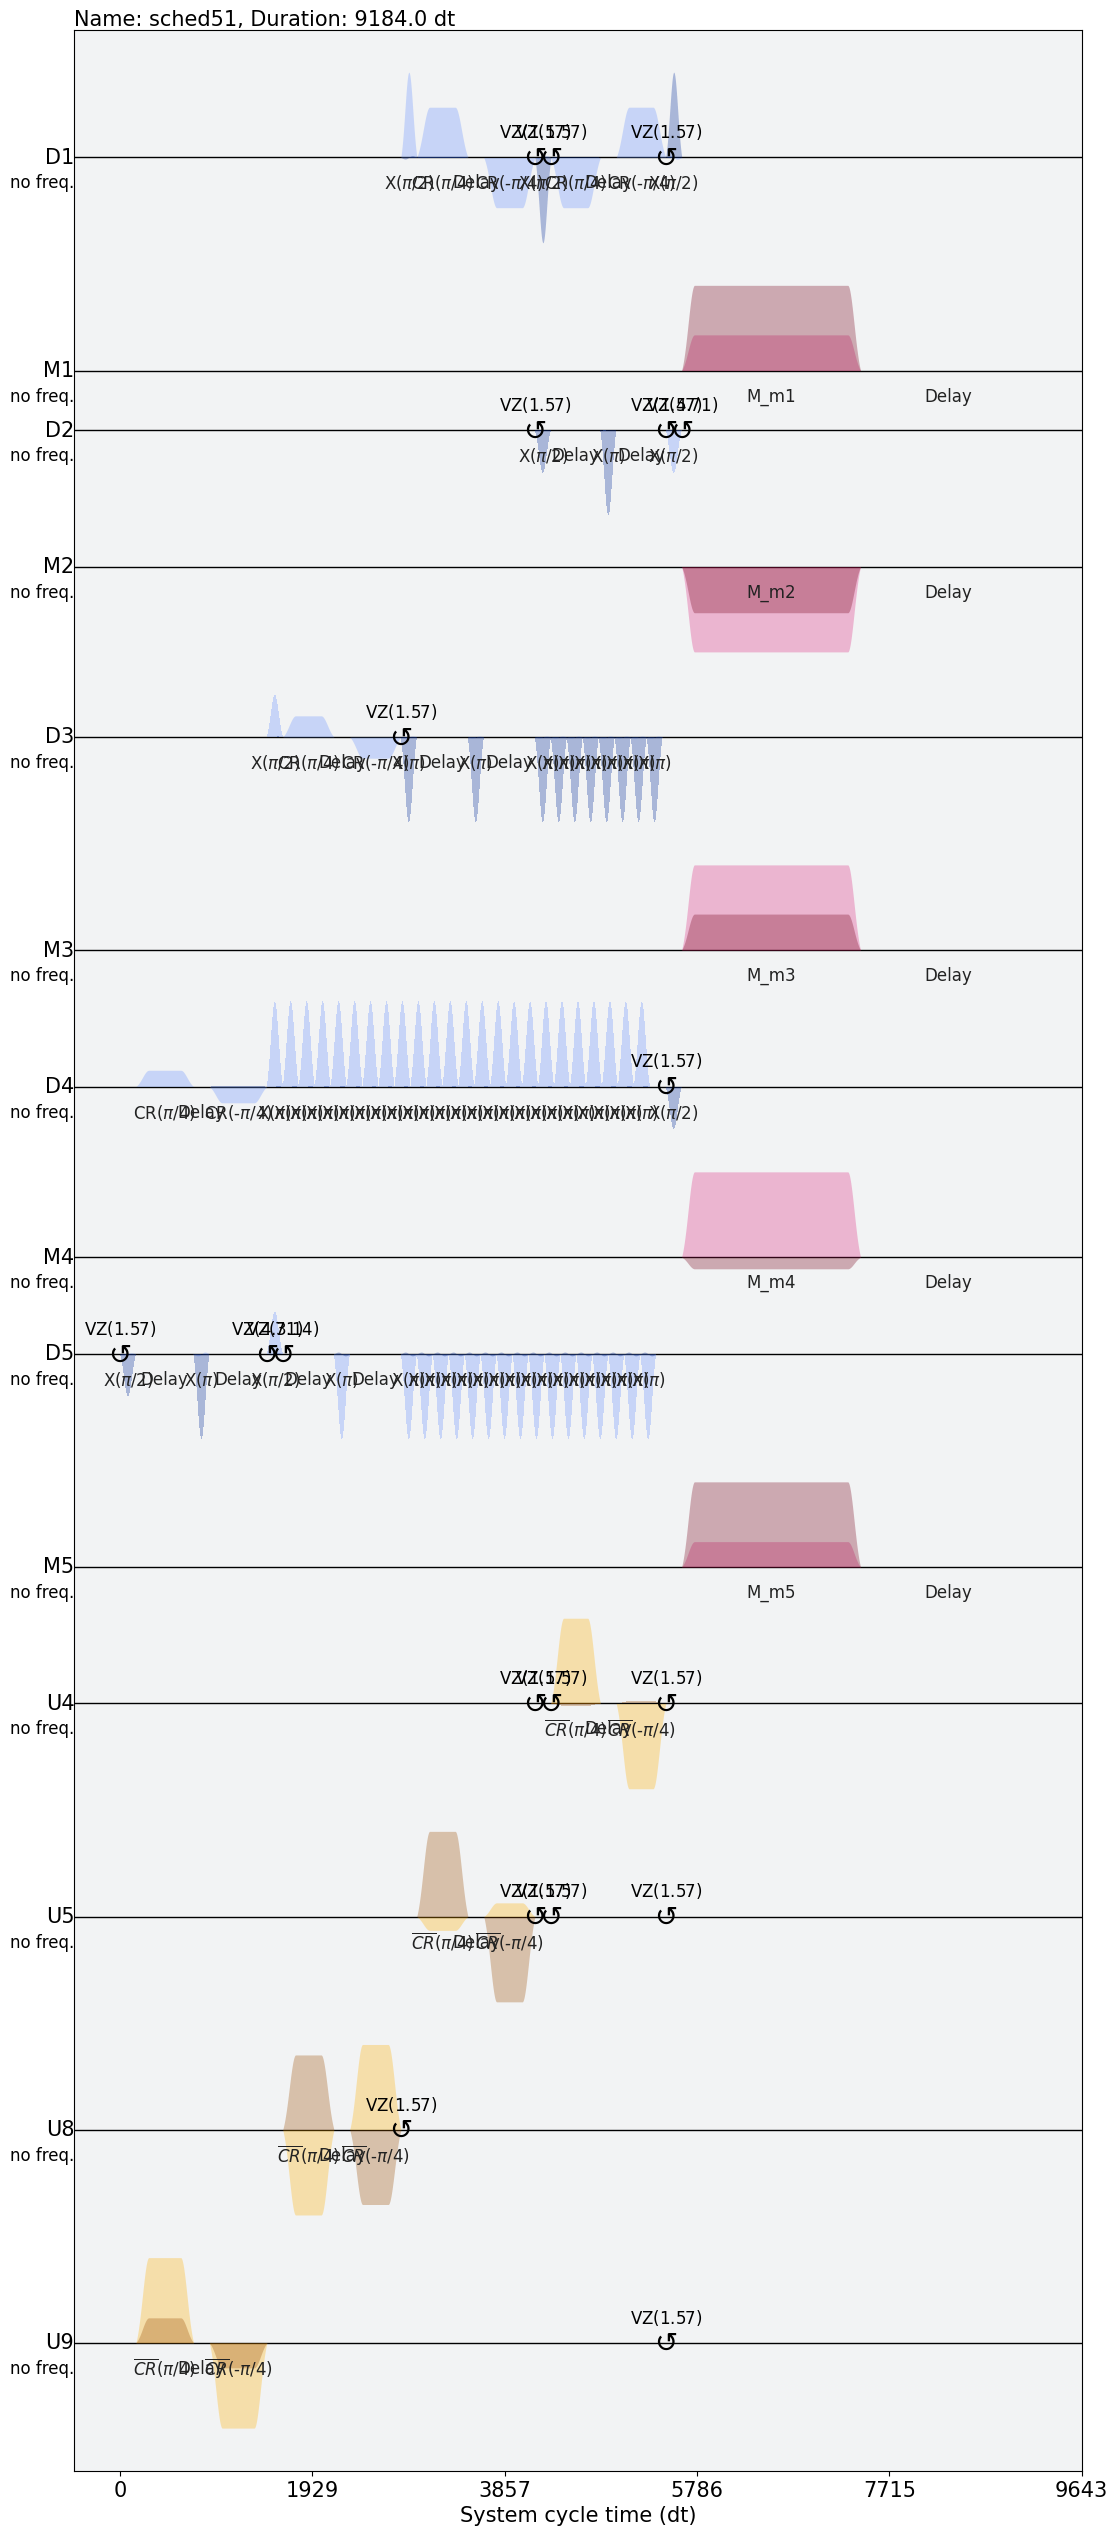

In [13]:
qc_compiled_dd_static.pulse_sequence.draw()

In [14]:
# Compile with dynamical decoupling ('static_context_aware' strategy)
qc_compiled_dd_static_context_aware = lagos_backend.compile(qc, dynamical_decoupling=True)
qc_compiled_dd_static_context_aware.circuit.draw(fold=-1)

/Users/paige/superstaq-env/lib/python3.10/site-packages/urllib3/connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


q_0: ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     ┌─────────┐                                                                                                      ┌─────────────┐┌─────────┐┌─────────┐┌─────────┐┌─────────────┐┌─────────┐┌─────────┐             ░ ┌─┐            
q_1: ┤ Rx(π/2) ├──────────────────────────────────────────────────────────────────────────────────────────────────────┤1            ├┤ Rz(π/2) ├┤ Rx(π/2) ├┤ Rz(π/2) ├┤1            ├┤ Rz(π/2) ├┤ Rx(π/2) ├─────────────░─┤M├────────────
     ├─────────┤┌─────────┐                                                                                           │             │└─────────┘└─────────┘└─────────┘│  Acecr(π/2) │├─────────┤├─────────┤┌──────────┐ ░ └╥┘┌─┐         
q_2: ┤ Rz(π/2) ├┤ Rx(π/2) ├───────────────────────────────────────────────────────────────────────────────────────────┤  Acecr(π/2) ├─────────────────────────────────┤0            ├┤ Rz(π/2) ├┤ Rx(π/2) ├┤ Rz(3π/2) ├─░──╫─┤M├─────────
     ├─────────┤└─────────┘                                                            ┌─────────────┐┌─────────┐┌───┐│             │   ┌───┐      ┌───┐              └─────────────┘└─────────┘└─────────┘└──────────┘ ░  ║ └╥┘┌─┐      
q_3: ┤ Rx(π/2) ├───────────────────────────────────────────────────────────────────────┤1            ├┤ Rz(π/2) ├┤ X ├┤0            ├───┤ X ├──────┤ X ├────────────────────────────────────────────────────────────────░──╫──╫─┤M├──────
     └─────────┘           ┌─────────────┐   ┌───┐       ┌───┐   ┌─────────┐┌─────────┐│             │└─────────┘└───┘└─────────────┘   └───┘      └───┘                                                                ░  ║  ║ └╥┘┌─┐   
q_4: ──────────────────────┤1            ├───┤ X ├───────┤ X ├───┤ Rz(π/2) ├┤ Rx(π/2) ├┤  Acecr(π/2) ├──────────────────────────────────────────────────────────────────────────────────────────────────────────────────░──╫──╫──╫─┤M├───
     ┌─────────┐┌─────────┐│  Acecr(π/2) │┌──┴───┴───┐┌──┴───┴──┐└┬───────┬┘└─────────┘│             │   ┌───┐   ┌───┐                                                                                                  ░  ║  ║  ║ └╥┘┌─┐
q_5: ┤ Rz(π/2) ├┤ Rx(π/2) ├┤0            ├┤ Rz(3π/2) ├┤ Rx(π/2) ├─┤ Rz(π) ├────────────┤0            ├───┤ X ├───┤ X ├──────────────────────────────────────────────────────────────────────────────────────────────────░──╫──╫──╫──╫─┤M├
     └─────────┘└─────────┘└─────────────┘└──────────┘└─────────┘ └───────┘            └─────────────┘   └───┘   └───┘                                                                                                  ░  ║  ║  ║  ║ └╥┘
q_6: ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╫──╫──╫──╫──╫─
                                                                                                                                                                                                                           ║  ║  ║  ║  ║ 
c: 5/══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╩══╩══╩══╩═
                                                                                                                                                                                                                           3  4  2  0  1

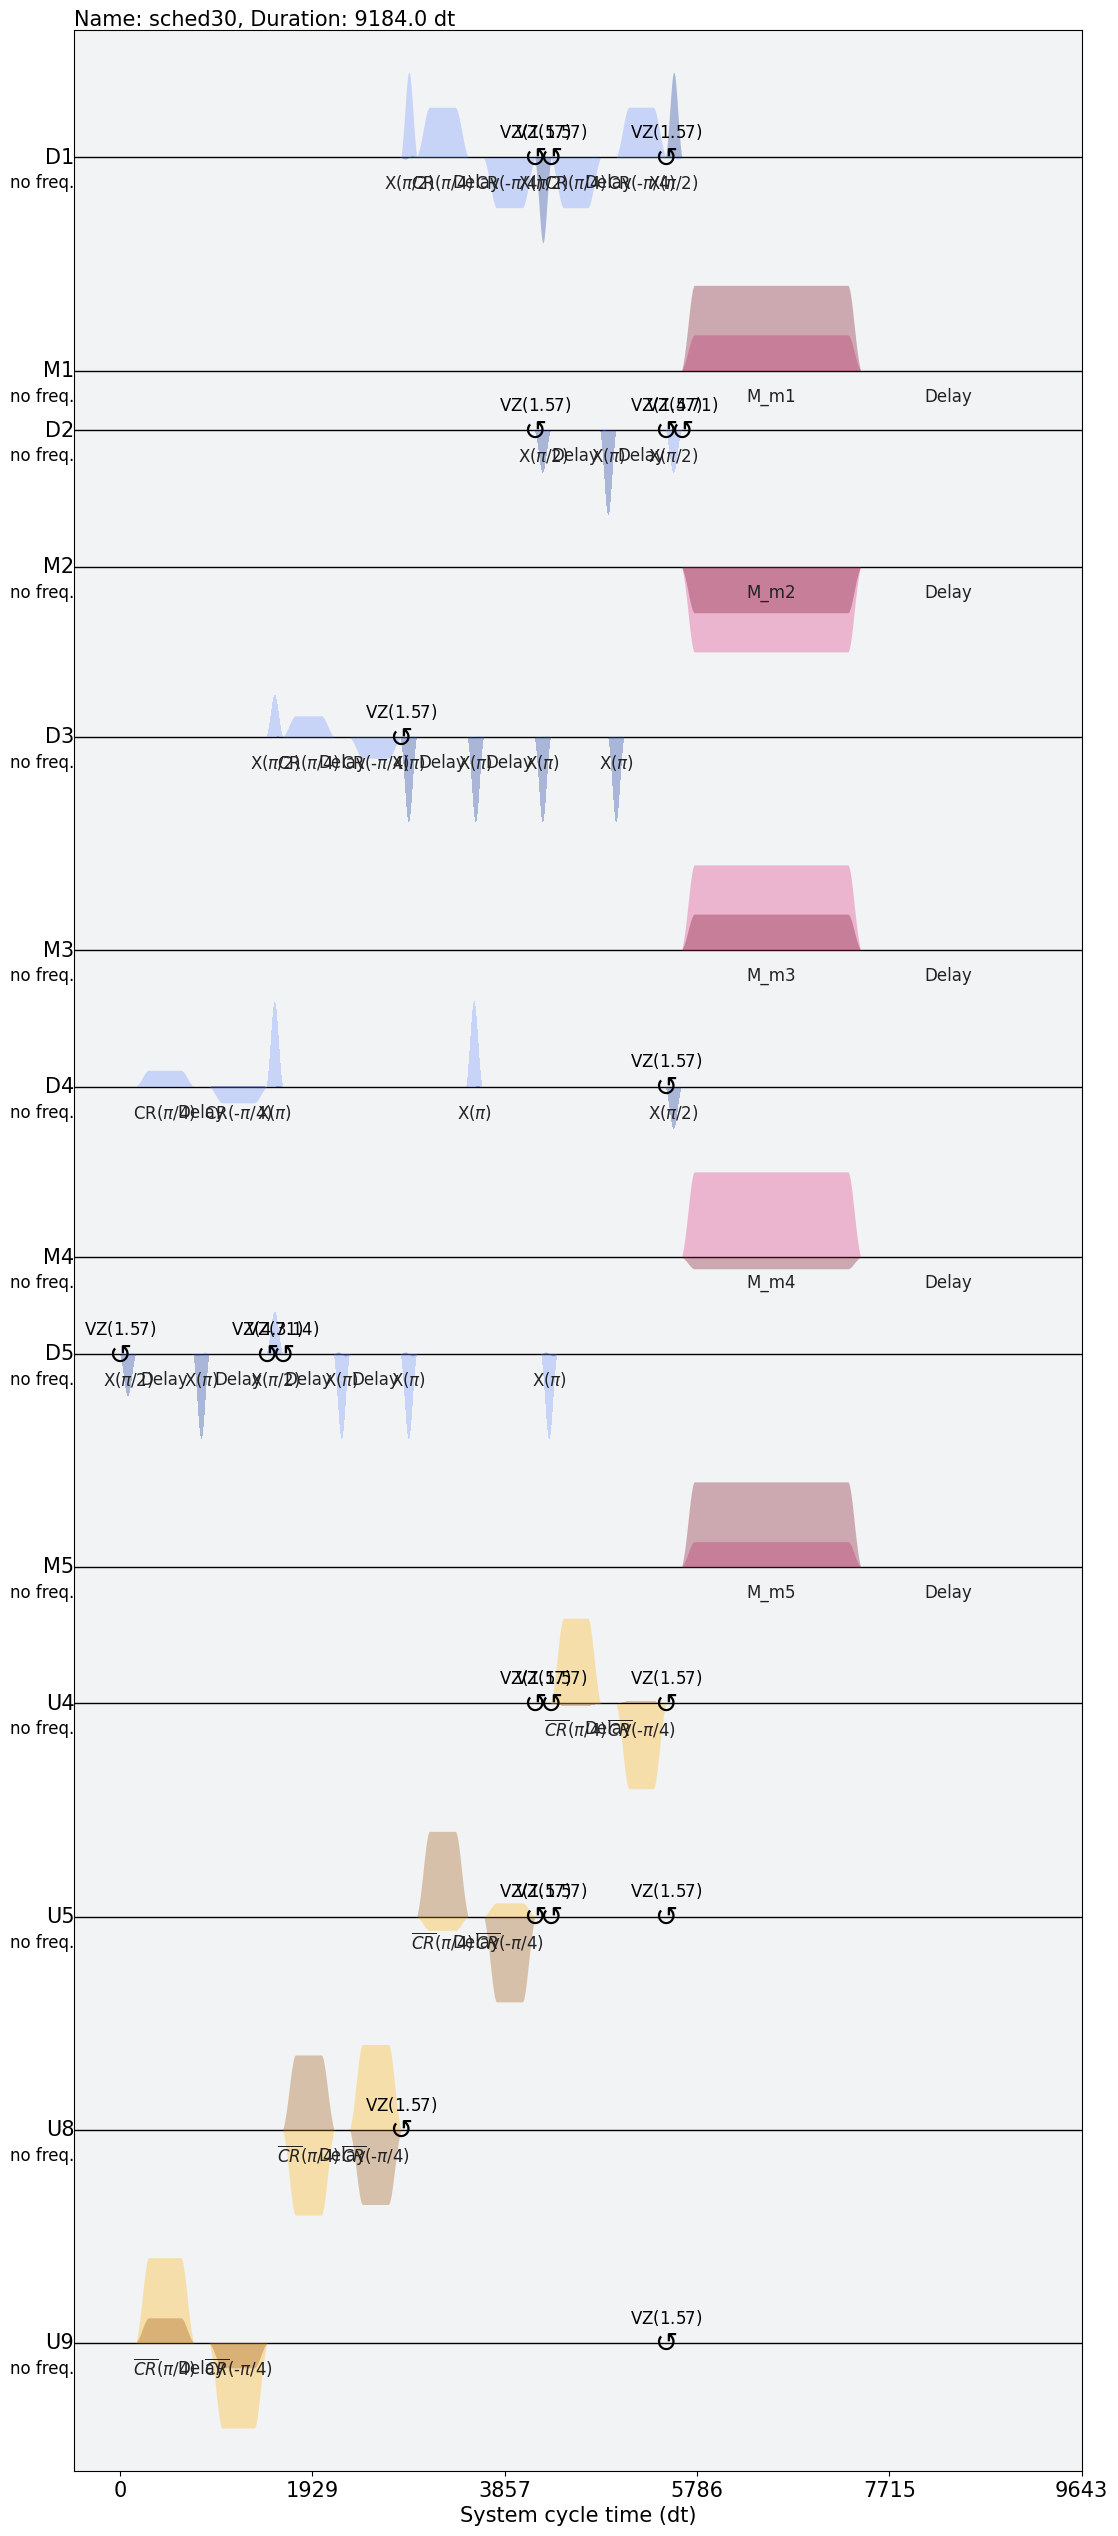

In [15]:
qc_compiled_dd_static_context_aware.pulse_sequence.draw()